<a href="https://colab.research.google.com/github/Ruphai/UBS/blob/main/Linear_Regression_RufaiBalogun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression by using the gradient descent algorithm**

In this notebook, we take a quick look at the optimisation function, herein called gradient descent and how it influences the selection of our model parameters. In this implementation, we considered the frequentist linear regression, where estimated the model parameter using a Maximum Likelihood Estimation. Afterwards, we evaluated how the model costs adjusted at each iteration of the gradient descent algorithm.

## Workspace utilities

In [ ]:
from sklearn import datasets
import os
import pandas as pd # data analysis
from scipy import stats # statistical description
import matplotlib.pyplot as plt # visualization
import numpy as np # mathetical computation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/

Mounted at /content/drive
/content/drive/My Drive


## Data


In [ ]:
#-- Reading the (training) data in a data frame
data = pd.read_csv("UBS/ML4EO/data/pm25_train_data.csv",  sep=';').dropna()
data.sample(10)

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
10177,216.0,12.0,14.1657,300.0,56.5488,13.7,1012.3,-8.3,0.0,3.9
10611,280.0,70.0,91.0000,2100.0,19.0000,6.3,1013.5,-12.3,0.0,1.3
3731,107.0,17.0,26.0000,900.0,172.0000,30.4,1009.1,16.0,0.0,2.6
7811,97.0,6.0,29.0000,600.0,215.0000,31.5,1001.7,17.4,0.0,1.4
10752,93.0,4.0,29.0000,600.0,230.0000,33.1,1000.1,15.1,0.0,1.0
9877,49.0,3.0,53.0000,600.0,24.0000,12.5,1026.7,-7.0,0.0,2.2
8046,137.0,3.0,42.0000,2200.0,8.0000,20.7,1005.6,19.5,0.4,1.4
7705,58.0,5.0,23.0000,600.0,96.0000,22.4,1006.7,11.5,0.0,2.0
3881,246.0,40.0,83.0000,2700.0,7.0000,2.8,1025.8,-4.0,0.0,1.1
6182,89.0,20.0,17.0000,400.0,66.0000,3.7,1023.4,-19.9,0.0,1.3


In [ ]:
#-- Save the explanatory variables in a variable X (and their names in a variable feature_names), and the target variable in Y
# select the target variables and the explanatory variables
target = "PM2.5"
Y = data[target]
X = data.drop(columns = [target])


In [ ]:
X.head()

,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
0,7.0,13.0,300.0,74.0,3.9,1027.3,-19.7,0.0,5.1
1,25.0,76.0,900.0,22.0,2.7,1027.3,-16.4,0.0,2.7
2,77.0,99.0,1600.0,14.0,13.8,1012.5,-13.3,0.0,1.1
3,12.0,14.0,400.0,77.0,14.2,1018.9,-13.9,0.0,2.7
4,104.0,136.0,2299.0,15.0,11.9,1009.7,-7.5,0.0,1.3


In [ ]:
Y.head()

0     24.0
1     93.0
2    117.0
3     58.0
4    226.0
Name: PM2.5, dtype: float64

In [ ]:
print("The shape of X is: ", X.shape, "\n", " The shape of Y is: ", Y.shape)

The shape of X is:  (11160, 9) 
  The shape of Y is:  (11160,)


## Exploratory Data Analysis
Here, a quick look at the statistical characteristics of the datasets is performed and the features with strong relationships with the target variables are computed. This step is an explorative step to check for the features that best fits our model or better still prepare new features to ease the development of our model.

In [ ]:
#-- Display some statistics on the data by using the describe function on the dataframe
#obtain a general statistics of the explanatory variables
X.describe()

,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
count,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,21.803471,44.614596,1165.918100,74.123981,17.943513,1009.810802,2.826747,0.046918,2.235968
std,26.880259,32.895568,1010.439512,51.904421,10.751609,10.075603,13.450111,0.535652,1.337821
min,0.856800,2.000000,100.000000,0.214200,-6.800000,984.500000,-31.300000,0.000000,0.000000
25%,4.000000,19.000000,500.000000,34.000000,8.200000,1001.800000,-8.200000,0.000000,1.300000
50%,12.000000,36.000000,900.000000,66.000000,20.000000,1009.300000,3.100000,0.000000,1.900000
75%,28.000000,62.000000,1500.000000,103.000000,27.400000,1017.600000,15.000000,0.000000,2.700000
max,224.000000,273.000000,10000.000000,345.000000,39.800000,1036.300000,28.500000,31.200000,12.900000


The statistical description of the explanatory variables in our data shows useful information about the center points and spread of each of the data. In this case, we had removed NaN values to capture only recorded and uncorrupted data points.

In [ ]:
corr = data.corr().round(3)
corr.style.background_gradient(cmap='bwr_r')

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
PM2.5,1.000000,0.485000,0.573000,0.637000,-0.218000,-0.247000,0.140000,-0.030000,-0.037000,-0.188000
SO2,0.485000,1.000000,0.599000,0.630000,-0.287000,-0.367000,0.232000,-0.242000,-0.042000,-0.163000
NO2,0.573000,0.599000,1.000000,0.744000,-0.418000,-0.217000,0.147000,0.015000,-0.010000,-0.348000
CO,0.637000,0.630000,0.744000,1.000000,-0.324000,-0.274000,0.139000,0.042000,0.022000,-0.314000
O3,-0.218000,-0.287000,-0.418000,-0.324000,1.000000,0.683000,-0.555000,0.460000,-0.030000,0.101000
temperature,-0.247000,-0.367000,-0.217000,-0.274000,0.683000,1.000000,-0.811000,0.810000,-0.001000,-0.093000
pressure,0.140000,0.232000,0.147000,0.139000,-0.555000,-0.811000,1.000000,-0.716000,-0.031000,0.062000
dew point,-0.030000,-0.242000,0.015000,0.042000,0.460000,0.810000,-0.716000,1.000000,0.088000,-0.350000
rainfall,-0.037000,-0.042000,-0.010000,0.022000,-0.030000,-0.001000,-0.031000,0.088000,1.000000,-0.035000
windspeed,-0.188000,-0.163000,-0.348000,-0.314000,0.101000,-0.093000,0.062000,-0.350000,-0.035000,1.000000


In this quick exploration, we checked for the correlation between each of the explanatory variables and the target variables (in this case PM2.5). The blue colors signifies positive correlation while the red colors signifies negative correlation. Overall, we observe both positive and negative correlation for each of the explanatory variables and the target variable. Since most of these negative correlation are weak, only the strong positively correlated variables would be selected for further analysis and modelling.

In [ ]:
#A quick scatter plot
#for i in X.columns:
 #   train_data.plot.scatter(x=i, y='PM2.5')

In [ ]:
# Select the explanatory variables that have the strongest positive correlation with PM 2.5 
explanatory_variables = ("SO2", "NO2", "CO")

[Text(0, 0.5, 'PM2.5'),
 Text(0.5, 0, 'CO'),
 Text(0.5, 1.0, 'Simple Fit of Linear regression on CO versus PM2.5')]

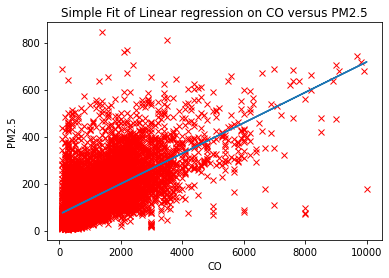

In [ ]:
#Variable for Linear regression:: strongest positive correlation
x=data['CO']
y=data['PM2.5']

plt.plot(x, y, 'rx')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.gca().set(title='Simple Fit of Linear regression on CO versus PM2.5', ylabel='PM2.5', xlabel='CO')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'CO Distribution')]

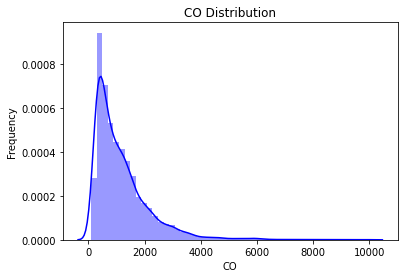

In [ ]:
# data distribution plot
import seaborn as sns 
#plt.hist(x, bins= 30)
sns.distplot(x, color='blue')
plt.gca().set(title='CO Distribution', ylabel='Frequency')

In [ ]:
#-- Select the explanatory variables for the simple linear regression, then the multiple linear regression, and display the scatter plots
#plt.figure(figsize=(15,5))
#plt.subplot(141).scatter(X['CO'], Y)
#plt.subplot(142).scatter(X['SO2'], Y)
#plt.subplot(143).scatter(X['NO2'], Y)
#plt.subplot(144).scatter(X['pressure'], Y)
#plt.show()

Text(0.5, 1.0, 'CO versus PM2.5')

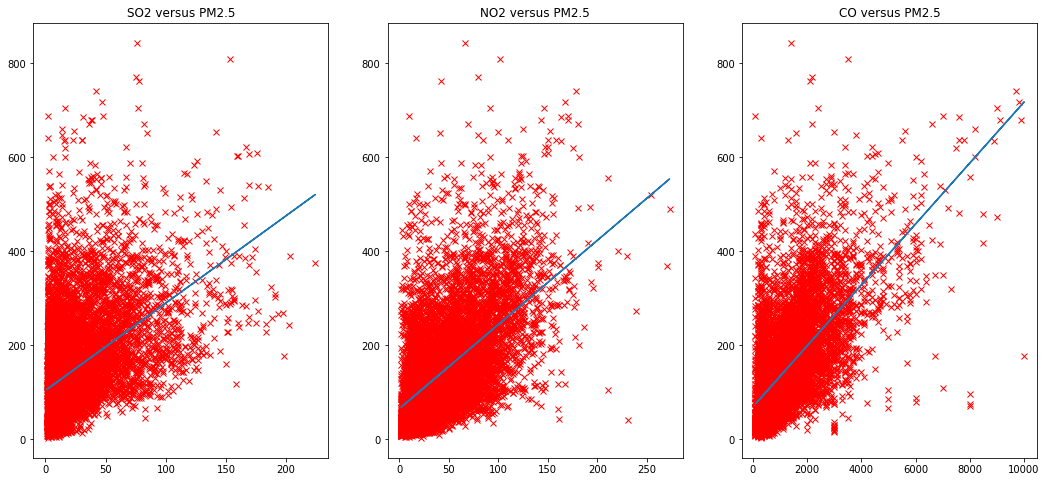

In [ ]:
# a quick scatter plots of the selected explanatory variables for multiple linear regression
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (18, 8))
ax1.plot(X['SO2'], Y, 'rx')
m, b = np.polyfit(X['SO2'], Y, 1)
ax1.plot(X['SO2'], m*X['SO2']+b)
ax1.set_title("SO2 versus PM2.5")
#(title=f'Simple Fit of Linear regression on , ylabel='PM2.5', xlabel=SO2)

ax2.plot(X['NO2'], Y, 'rx')
m, b = np.polyfit(X['NO2'], Y, 1)
ax2.plot(X['NO2'], m*X['NO2']+b)
ax2.set_title("NO2 versus PM2.5")

ax3.plot(X['CO'], Y, 'rx')
m, b = np.polyfit(X['CO'], Y, 1)
ax3.plot(X['CO'], m*X['CO']+b)
ax3.set_title("CO versus PM2.5")


## Data preparation
Here, we perform a quick mean-centering standardization of our explanatory variables and create our standard data matrix (with dimension d+1, m)

In [ ]:
#-- Extract the data and creates two X matrices that will be used for the regression (have a look at page 26 to know the form of X):
#---- Xs for simple lin reg and Xm for multiple lin reg

# selecting X matrices for simple linear regression and multiple linear regression
Xs = np.vstack((X.loc[:, ['CO']].to_numpy()))
Xm = np.vstack((X.loc[:, ["SO2", "CO", "NO2"]].to_numpy()))

#-- Check the size of both matrices
print("The shape of X matrix for simple linear regression is: ", Xs.shape, "\n", 
      "The shape of X matrix for multiple linear regression is: ", Xm.shape)
# Hint: use stack/hstack/vstack

The shape of X matrix for simple linear regression is:  (11160, 1) 
 The shape of X matrix for multiple linear regression is:  (11160, 3)


In [ ]:
#--- Write the standardisation function to mean-center the X data
# for mean-centering data, it is given that for every value in a x matrix, Xj = xj-x*j

# Normalizing the data around the center

def standardisation(X):
  return ((X - np.nanmean(X, axis = 0))/np.nanstd(X, axis = 0))

#-- Test 1 - simple lin reg
Xs_std = standardisation(Xs)
print('Standardized X matrix for linear regression: \n', Xs)

print('\n')
#-- Test 2 - multiple lin reg
Xm_std = standardisation(Xm)
print('Standardized X matrix for multiple regression: \n', Xm)

Standardized X matrix for linear regression: 
 [[ 300.]
 [ 900.]
 [1600.]
 ...
 [3000.]
 [ 500.]
 [1200.]]


Standardized X matrix for multiple regression: 
 [[   7.  300.   13.]
 [  25.  900.   76.]
 [  77. 1600.   99.]
 ...
 [  46. 3000.   99.]
 [   7.  500.   15.]
 [  12. 1200.   54.]]


In [ ]:
print(stats.describe(Xs))

DescribeResult(nobs=11160, minmax=(array([100.]), array([10000.])), mean=array([1165.91810036]), variance=array([1020988.00673391]), skewness=array([2.39100859]), kurtosis=array([9.40441346]))


In [ ]:
#-- Preparing the matrix used for the regression linear when using the gradient descent algorithm add 1 vector column
ones = np.ones((len(X['SO2']), 1))
Xs = np.hstack((ones, Xs_std))
Xm = np.hstack((ones, Xm_std))

In [ ]:
Xs

array([[ 1.        , -0.85701013],
       [ 1.        , -0.26318252],
       [ 1.        ,  0.42961636],
       ...,
       [ 1.        ,  1.81521413],
       [ 1.        , -0.65906759],
       [ 1.        ,  0.03373129]])

In [ ]:
Xm

array([[ 1.        , -0.55074374, -0.85701013, -0.96110249],
       [ 1.        ,  0.11892268, -0.26318252,  0.9541349 ],
       [ 1.        ,  2.05351456,  0.42961636,  1.65334855],
       ...,
       [ 1.        ,  0.90020017,  1.81521413,  1.65334855],
       [ 1.        , -0.55074374, -0.65906759, -0.9003013 ],
       [ 1.        , -0.36472529,  0.03373129,  0.28532184]])

## Least squares or maximum likelihood solution

In [ ]:
#-- To compare the results of the gradient descent algorithm, we will first implement an exact solution with the maximum likelihood
#Formulae recall: (X^T X)^-1 X^T Y
def coef_ml(X, Y):
  #computes the exact solution using the explicit solution formulation for 
  #Maximum likelihood based on the Gauss-Markov's theorem

  beta_optimal = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
  return beta_optimal

#-- Test 1  - simple regression
Bs = coef_ml(Xs, Y)
print(Bs)

#-- Test 2 - multiple regression
Bm = coef_ml(Xm, Y)
print(Bm)

#-- (We can also use the native functions of Scikit-Learn, but they are more parameters that needs to be tuned)

[144.78560932  65.52511973]
[144.78560932  10.09770389  44.35093241  19.89503689]


## Gradient descent algorithm

In the following we will implement several functions to apply linear regression.
These functions should be generic and work for any number of explanatory variables. You should be able to apply them to Xs and Xm standardized variables.

WARNING: parameters of the functions needs to be completed

In [ ]:
#-- Model
# Do this computation without for loop, 
# Except for the gradient descent iterations. 
def f(X, B):
  return np.dot(X, B)

#-- Test 1 - simple reg
XfuncLin = f(Xs, Bs)
XfuncLin

#-- Test 2 - multiple reg
XfuncMult = f(Xm, Bm)
XfuncMult

array([ 82.09399419, 153.29661435, 217.46870806, ..., 267.27543366,
        92.08257216, 148.27522406])

In [ ]:
#%% Cost function
def cout(x, y, beta):
  # no. of observations
    m = y.shape[0]
    cost = (np.sum(np.square(f(x, beta) - y)))/(2*m)
    return cost

#%% Test 1 - simple reg
Js = cout(Xs, Y, Bs)
print(Js)

#%% Test 2 - multiple reg
Jm = cout(Xm, Y, Bm)
print(Jm)

3149.7114780201705
3004.7105796697406


In [ ]:
#%% Computation of the gradient
def grad(x, y, betas):
  #no. of observations
    m = x.shape[0]
    return 1/m * (np.dot((f(x, betas)-y),x))

#%% Test 1 - simple reg
Gs = grad(Xs, Y, Bs)
print(Gs)
#%% Test 2 - multiple reg
Gm = grad(Xm, Y, Bm)
print(Gm)

[-6.51967528e-16 -1.21428952e-14]
[-1.56472207e-14 -7.14719403e-14 -3.40653033e-14  4.15578364e-14]


In [ ]:
#gradient descent algorithm
def grad_descent(x, y, beta, alpha, no_of_iter, tolerance = 0.001):

    """
    Gradient Descent Algorithm: An optimisation function for selecting the best 
    model parameter. Here, we implement the gradient descent algorithm for 
    selecting the optimal beta parameters for a linear model
    """

    #size of observations
    size = x.shape[1]

    #list to store the beta values and cost values
    parameters = np.zeros((no_of_iter, size))

    costs=[]
    
    #calculate the beta values for each iteration

    for i in range(no_of_iter):

      beta = beta - alpha*grad(x, y, beta)
      parameters[i,:]=beta

      cost= cout(x, y, beta)

      if len(costs)>2 and costs[-1]-cost<tolerance:
        break
      costs.append(cost)

    return beta, parameters, costs

In [ ]:
# Test Gradient Descent Algorithm for Simple Linear Regression
#-- Test 1  - simple reg
# set up the values of gradient descent parameters

alpha, iter = 0.001, 5000
vector_size=Xs.shape[1]

#initialize beta value
beta=np.random.randn(vector_size,)

beta_s, parameters_s, costs_s= grad_descent(Xs, Y, beta, alpha, iter)

In [ ]:
optimal_parameter_s = parameters_s[len(costs_s)-1]
print("The optimal parameter for SLR are: ", optimal_parameter_s)

The optimal parameter for SLR are:  [143.8135428  65.0874613]


Text(0.5, 1.0, 'Cost versus number of iterations: SLR')

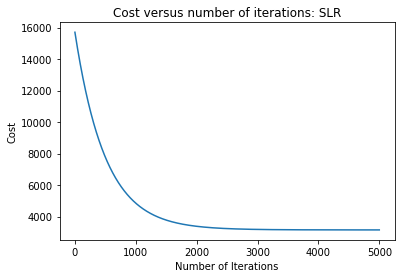

In [ ]:
# Graphical plot of the cost (mean-squared error) per iteration
# Cost per iteration analysis for single linear regression
plt.plot(range(len(costs_s)),costs_s)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost versus number of iterations: SLR')

In [ ]:
#Test Gradient Descent Algorithm for Multiple Linear Regression
#-- Test 2 - multiple reg
vector_size=Xm.shape[1]
beta=np.random.randn(vector_size,)
beta_m, parameters_m, costs_m= grad_descent(Xm, Y, beta, alpha, iter)

In [ ]:
optimal_parameter_m = parameters_m[len(costs_m)-1]
print("The optimal parameters for MLR are: ", optimal_parameter_m)

The optimal parameters for MLR are:  [143.80949764  11.96868548  39.88024377  22.67133856]


Text(0.5, 1.0, 'Cost versus number of iterations: MLR')

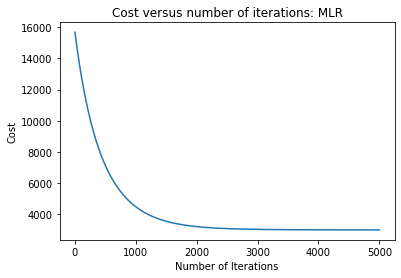

In [ ]:
# Graphical plot of the cost (mean-squared error) per iteration
# Cost per iteration analysis for single linear regression
plt.plot(range(len(costs_m)),costs_m)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost versus number of iterations: MLR')

## Experiment with several initialisations: visualisation of the cost function and parameter values during the iterations

In [ ]:
#-- Test 1 -- simple linear regression: Adjust parameter value initialization.

vector_size=Xs.shape[1]

# set initialisation to zero:
initials = [1, 10, 20, 50] #different initializations
cost_i = []
for i in initials:
  beta=i*np.ones(vector_size,)
  beta_s1, parameters_s1, costs_s1= grad_descent(Xs, Y, beta, alpha, iter)
  cost_i.append(costs_s1)

In [ ]:
optimal_parameter_s1 = parameters_s1[len(costs_s1)-1]
optimal_parameter_s1

array([143.7991818 ,  65.36355084])

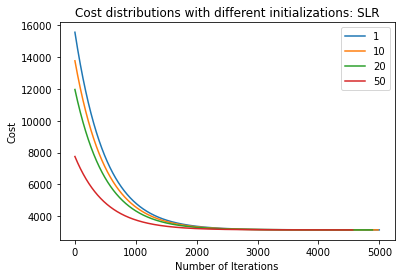

In [ ]:
idx =[0, 1, 2, 3]
for i in idx:
  plt.plot(range(len(cost_i[i])),cost_i[i])
  plt.xlabel('Number of Iterations')
  
  plt.ylabel('Cost')
  plt.legend(labels = initials)
  plt.title('Cost distributions with different initializations: SLR')

In [ ]:
#-- Test 2 - multiple linear regression: adjust parameter value initialisation
vector_size=Xm.shape[1]

# set initialisation to zero:
initials = [1, 10, 20, 50] #different initializations
cost_i = []
for i in initials:
  beta=i*np.ones(vector_size,)
  beta_s1, parameters_s1, costs_s1= grad_descent(Xm, Y, beta, alpha, iter)
  cost_i.append(costs_s1)


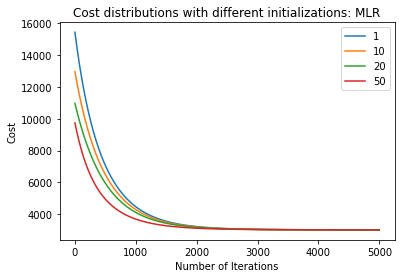

In [ ]:
idx =[0, 1, 2, 3]
for i in idx:
  plt.plot(range(len(cost_i[i])),cost_i[i])
  plt.xlabel('Number of Iterations')
  plt.ylabel('Cost')
  plt.legend(labels = initials)
  plt.title('Cost distributions with different initializations: MLR')

**Notes:**
Here, we see similar behaviour in the distribution of the cost regardless of the initial beta parameter. This shows the specificity of the gradient descent optimisation algorithm in finding the global minima in our model parameter regardless of the initial learning parameter. 

## Experiment with several learning rates: visualisation of the cost function and parameter values during the iterations

In [ ]:
#-- Test 1  - simple reg
learning_rate = (0.0001, 0.005, 0.01)
cost_lr = []
vector_size=Xs.shape[1]
beta = np.random.randn(vector_size,)
for i in learning_rate:
  beta, parameters, costs= grad_descent(Xs, Y, beta,i, iter)
  cost_lr.append(costs)
#-- Test 2 - multiple reg


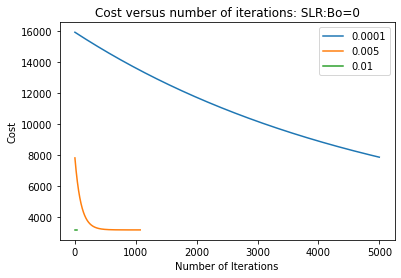

In [ ]:
no =[0, 1, 2]
for i in no:
  plt.plot(range(len(cost_lr[i])),cost_lr[i])
  plt.xlabel('Number of Iterations')
  plt.ylabel('Cost')
  plt.legend(labels = learning_rate)
  plt.title('Cost versus number of iterations: SLR:Bo=0')

**Notes:**
Here, we see three different learning rates showing different behaviour for the distribution of our cost function. The very small learning rate (0.0001) could not converge and reach the global minimum in our data, whereas a large learning rate (0.01) converged very quickly but risks getting stucked in a local minima. Notwithstanding, we were able to reach a compromise with 0.005 learning rate which shows a gradual progression of the cost and eventual convergence at about 1000 iterations.

## **Notes**
Analysis your results: short description of your analysis and visualization.


**On the choice of the stopping criterion:**
Since Gradient Descent Algorithm is an iterative algorithm that searches for th optimal parameter that minimizes the cost, we therefore need an efficient way of defining what an optimal cost would be. To do this, we use two approaches:

I. Setting specific number of iteration at which our gradient descent will search through the data. Otherwise in cases where the algorithm does not converge, then it runs forever.

II. Set a tolerance threshold to compare two consecutive costs computed in the gradient descent function. Since, we intend to optimize this cost, our aim is to get the difference between two consecutive cost to be closer to zero as much as possible. Hence we set this tolerance as close to zero as possible.


**On the data normalisation:**

Two steps were incorporation into the feature engineering of the data used for this analysis. First, a mean-centering data normalisation process to reduce the effects of high-variance data points on the overall data distribution. And second , extending the data matrix by an additional column of ones to capture the intercept in the linear regression model.  The former uses the standard deviation of the sample to to fix the variance and keep the data invariant to outliers.




